In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from eda_schema.entity import PHASES
from eda_schema.dataset import Dataset
from eda_schema.db import SQLitePickleDB

dataset = Dataset(SQLitePickleDB("../test_data/eda_schema_barelypass_subset"))

In [2]:
CIRCUITS = list(dataset.db.get_table_data("netlists", netlist_id="id-000001", phase="global_route").circuit)
print("Circuits:", *CIRCUITS, sep="\n- ")

Circuits:
- tv80
- i2c
- mem_ctrl
- simple_spi
- systemcaes
- usb_phy
- sasc
- aes_core


In [3]:
print("Phases:", *PHASES, sep="\n- ")

Phases:
- floorplan
- global_place
- detailed_place
- cts
- global_route
- detailed_route


In [4]:
selected_circuits = CIRCUITS
for circuit in selected_circuits:
    print(circuit)
    dataset.load_dataset(circuit=circuit, phase="global_place")
    dataset.load_dataset(circuit=circuit, phase="detailed_place")
    dataset.load_dataset(circuit=circuit, phase="detailed_route")    

tv80
i2c
mem_ctrl
simple_spi
systemcaes
usb_phy
sasc
aes_core


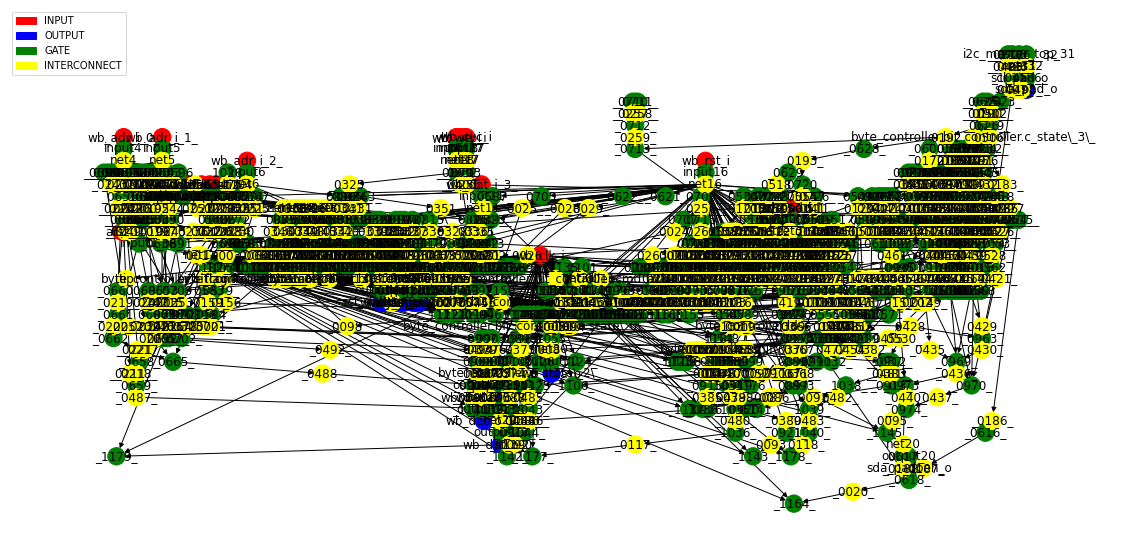

In [5]:
plt.figure(figsize=(20, 10))
netlist = dataset[("i2c", 'id-000001', "detailed_place")]
netlist.plot()

In [6]:
netlist.asdict()

{'width': 157.31,
 'height': 157.31,
 'no_of_inputs': 19,
 'no_of_outputs': 14,
 'no_of_cells': 925,
 'no_of_nets': 543,
 'utilization': 34,
 'cell_density': 0.1267470539873938,
 'pin_density': 0.33337900794738284,
 'net_density': 0.07440394628665388}

In [7]:
netlist.cell_metrics.asdict()

{'no_of_combinational_cells': 796,
 'no_of_sequential_cells': 129,
 'no_of_buffers': 30,
 'no_of_inverters': 16,
 'no_of_macros': 0,
 'no_of_total_cells': 925}

In [8]:
netlist.area_metrics.asdict()

{'combinational_cell_area': 4010.096000000009,
 'sequential_cell_area': 3288.153599999995,
 'buffer_area': 207.6992000000001,
 'inverter_area': 60.05759999999999,
 'macro_area': 0,
 'cell_area': 7298.2496000000265,
 'net_area': 0,
 'total_area': 7298}

In [9]:
netlist.power_metrics.asdict()

{'combinational_power': 0.000432,
 'sequential_power': 0.00233,
 'macro_power': 0.0,
 'internal_power': 0.00248,
 'switching_power': 0.000276,
 'leakage_power': 2.99e-09,
 'total_power': 0.00276}

In [10]:
for node in netlist:
    print(node, netlist.nodes[node]["type"])

arst_i IO_PORT
scl_pad_i IO_PORT
scl_pad_o IO_PORT
scl_padoen_o IO_PORT
sda_pad_i IO_PORT
sda_pad_o IO_PORT
sda_padoen_o IO_PORT
wb_ack_o IO_PORT
wb_adr_i_0_ IO_PORT
wb_adr_i_1_ IO_PORT
wb_adr_i_2_ IO_PORT
wb_clk_i IO_PORT
wb_cyc_i IO_PORT
wb_dat_i_0_ IO_PORT
wb_dat_i_1_ IO_PORT
wb_dat_i_2_ IO_PORT
wb_dat_i_3_ IO_PORT
wb_dat_i_4_ IO_PORT
wb_dat_i_5_ IO_PORT
wb_dat_i_6_ IO_PORT
wb_dat_i_7_ IO_PORT
wb_dat_o_0_ IO_PORT
wb_dat_o_1_ IO_PORT
wb_dat_o_2_ IO_PORT
wb_dat_o_3_ IO_PORT
wb_dat_o_4_ IO_PORT
wb_dat_o_5_ IO_PORT
wb_dat_o_6_ IO_PORT
wb_dat_o_7_ IO_PORT
wb_inta_o IO_PORT
wb_rst_i IO_PORT
wb_stb_i IO_PORT
wb_we_i IO_PORT
net31 INTERCONNECT
_0533_ GATE
_0534_ GATE
_0536_ GATE
_0538_ GATE
_0539_ GATE
_0540_ GATE
_0541_ GATE
_0542_ GATE
_0543_ GATE
_0544_ GATE
_0546_ GATE
_0547_ GATE
_0548_ GATE
_0549_ GATE
_0550_ GATE
_0551_ GATE
_0552_ GATE
_0553_ GATE
_0554_ GATE
_0555_ GATE
_0556_ GATE
_0557_ GATE
_0558_ GATE
_0559_ GATE
_0560_ GATE
_0561_ GATE
_0562_ GATE
_0563_ GATE
_0564_ GATE
_0565

_0330_ INTERCONNECT
_0331_ INTERCONNECT
_0332_ INTERCONNECT
_0333_ INTERCONNECT
_0334_ INTERCONNECT
_0335_ INTERCONNECT
_0336_ INTERCONNECT
_0337_ INTERCONNECT
_0338_ INTERCONNECT
_0339_ INTERCONNECT
_0340_ INTERCONNECT
_0341_ INTERCONNECT
_0342_ INTERCONNECT
_0343_ INTERCONNECT
_0344_ INTERCONNECT
_0345_ INTERCONNECT
_0346_ INTERCONNECT
_0347_ INTERCONNECT
_0348_ INTERCONNECT
_0349_ INTERCONNECT
_0350_ INTERCONNECT
_0351_ INTERCONNECT
_0352_ INTERCONNECT
_0353_ INTERCONNECT
_0354_ INTERCONNECT
_0355_ INTERCONNECT
_0356_ INTERCONNECT
_0357_ INTERCONNECT
_0358_ INTERCONNECT
_0359_ INTERCONNECT
_0360_ INTERCONNECT
_0361_ INTERCONNECT
_0362_ INTERCONNECT
_0366_ INTERCONNECT
_0367_ INTERCONNECT
_0368_ INTERCONNECT
_0369_ INTERCONNECT
_0370_ INTERCONNECT
_0371_ INTERCONNECT
_0372_ INTERCONNECT
_0373_ INTERCONNECT
_0374_ INTERCONNECT
_0375_ INTERCONNECT
_0376_ INTERCONNECT
_0377_ INTERCONNECT
_0378_ INTERCONNECT
_0379_ INTERCONNECT
_0380_ INTERCONNECT
_0381_ INTERCONNECT
_0382_ INTERCONNECT


In [11]:
input_name = "arst_i"
input_entity = netlist.nodes[input_name]["entity"]
input_entity.asdict()

{'name': 'arst_i',
 'direction': 'INPUT',
 'x': 156.91,
 'y': 12.58,
 'capacitance': None}

In [12]:
output_name = "scl_pad_o"
output_entity = netlist.nodes[output_name]["entity"]
output_entity.asdict()

{'name': 'scl_pad_o',
 'direction': 'OUTPUT',
 'x': 11.27,
 'y': 0.242,
 'capacitance': None}

In [13]:
gate_name = "_0540_"
gate_entity = netlist.nodes[gate_name]["entity"]
gate_entity.asdict()

{'name': '_0540_',
 'standard_cell': 'sky130_fd_sc_hd__nor2_1',
 'no_of_fanins': 0,
 'no_of_fanouts': 1,
 'x': 36.34,
 'y': 46.24}

In [14]:
net_name = "_0244_"
net_entity = netlist.nodes[net_name]["entity"]
net_entity.asdict()

{'name': '_0244_',
 'no_of_inputs': 1,
 'no_of_outputs': 1,
 'x_min': 39.315000000000005,
 'y_min': 79.05,
 'x_max': 40.185,
 'y_max': 81.92999999999999,
 'length': None,
 'hpwl': 3.749999999999993,
 'rudy': 0.6681599999999983,
 'resistance': None,
 'capacitance': None}

{'startpoint': '_1162_',
 'endpoint': '_1158_',
 'path_type': 'max',
 'sort_index': 0,
 'arrival_time': 1.92231059,
 'required_time': 2.19192672,
 'slack': 0.26961613,
 'no_of_gates': 13,
 'is_critical_path': False}

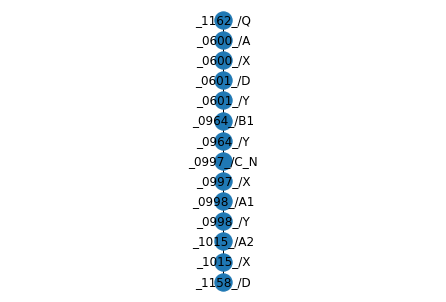

In [15]:
timing_path = netlist.timing_paths[('_1162_', '_1158_', 'max')][0]
timing_path.plot()
timing_path.asdict()

In [16]:
for node in timing_path:
    timing_point_entity = timing_path.nodes[node]["entity"]
    print(timing_point_entity.asdict())

{'name': '_1162_/Q', 'gate': '_1162_', 'standard_cell': 'sky130_fd_sc_hd__dfrtp_4', 'pin': 'Q', 'cell_delay': 0.48291412, 'arrival_time': 0.49291411, 'slew': 0.0834127, 'is_rise_transition': False, 'is_fall_transition': True, 'node_depth': 0}
{'name': '_0600_/A', 'gate': '_0600_', 'standard_cell': 'sky130_fd_sc_hd__or4_1', 'pin': 'A', 'cell_delay': 0.0, 'arrival_time': 0.49291411, 'slew': 0.0834127, 'is_rise_transition': False, 'is_fall_transition': True, 'node_depth': 1}
{'name': '_0600_/X', 'gate': '_0600_', 'standard_cell': 'sky130_fd_sc_hd__or4_1', 'pin': 'X', 'cell_delay': 0.53562427, 'arrival_time': 1.02853835, 'slew': 0.09287079, 'is_rise_transition': False, 'is_fall_transition': True, 'node_depth': 2}
{'name': '_0601_/D', 'gate': '_0601_', 'standard_cell': 'sky130_fd_sc_hd__nor4_2', 'pin': 'D', 'cell_delay': 0.0, 'arrival_time': 1.02853835, 'slew': 0.09287079, 'is_rise_transition': False, 'is_fall_transition': True, 'node_depth': 3}
{'name': '_0601_/Y', 'gate': '_0601_', 'stand

In [17]:
import pandas as pd
data = []
for key, netlist in dataset.items():
    if "detailed_route" not in key:
        continue
    for tp_list in netlist.timing_paths.values():
        for tp in tp_list:
            data.append({**{'circuit': key[0], 'netlist_id': 'id-000020', 'phase': 'detailed_route'}, **tp.asdict()})
            data[-1]["no_of_gates"] = (data[-1]["no_of_gates"])//2
pd.DataFrame(data)

circuit netlist_id           phase startpoint endpoint path_type  \
0          tv80  id-000020  detailed_route     _8550_   iorq_n       min   
1          tv80  id-000020  detailed_route     _8550_   iorq_n       min   
2          tv80  id-000020  detailed_route     _8549_   mreq_n       min   
3          tv80  id-000020  detailed_route     _8549_   mreq_n       min   
4          tv80  id-000020  detailed_route     _8551_     rd_n       min   
...         ...        ...             ...        ...      ...       ...   
38813  aes_core  id-000020  detailed_route    _25391_  _25364_       max   
38814  aes_core  id-000020  detailed_route    _25155_  _25272_       max   
38815  aes_core  id-000020  detailed_route    _25155_  _25272_       max   
38816  aes_core  id-000020  detailed_route    _25155_  _25272_       max   
38817  aes_core  id-000020  detailed_route    _25121_  _25312_       max   

       sort_index  arrival_time  required_time     slack  no_of_gates  \
0               0      0.341832       0.200000  0.141832            1   
1               1      0.342768       0.200000  0.142768            1   
2               0      0.341832       0.200000  0.141832            1   
3               1      0.342768       0.200000  0.142768            1   
4               0      0.341832       0.200000  0.141832            1   
...           ...           ...            ...       ...          ...   
38813           0      3.165393       4.211950  1.046557           12   
38814           0      3.122554       4.169160  1.046606           10   
38815           1      3.122554       4.169160  1.046606           10   
38816           2      3.122554       4.169160  1.046606           10   
38817           0      3.142307       4.189722  1.047415           14   

       is_critical_path  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  
...                 ...  
38813             False  
38814             False  
38815             False  
38816             False  
38817             False  

[38818 rows x 12 columns]

In [18]:
timing_path_df = dataset.db.get_table_data("timing_paths", phase="detailed_route", path_type="max")
timing_path_df

circuit netlist_id           phase startpoint endpoint path_type  \
0          tv80  id-000001  detailed_route     _8886_   _8622_       max   
1          tv80  id-000001  detailed_route     _8886_   _8622_       max   
2          tv80  id-000001  detailed_route     _8886_   _8622_       max   
3          tv80  id-000001  detailed_route     _8886_   _8622_       max   
4          tv80  id-000001  detailed_route     _8886_   _8622_       max   
...         ...        ...             ...        ...      ...       ...   
19404  aes_core  id-000001  detailed_route    _25391_  _25364_       max   
19405  aes_core  id-000001  detailed_route    _25155_  _25272_       max   
19406  aes_core  id-000001  detailed_route    _25155_  _25272_       max   
19407  aes_core  id-000001  detailed_route    _25155_  _25272_       max   
19408  aes_core  id-000001  detailed_route    _25121_  _25312_       max   

       sort_index  arrival_time  required_time     slack  no_of_gates  \
0             0.0      6.680149       7.186763  0.506614         63.0   
1             1.0      6.673693       7.186763  0.513070         61.0   
2             2.0      6.663270       7.186763  0.523493         65.0   
3             3.0      6.658748       7.186763  0.528015         63.0   
4             4.0      6.655694       7.186763  0.531069         65.0   
...           ...           ...            ...       ...          ...   
19404         0.0      3.165393       4.211950  1.046557         25.0   
19405         0.0      3.122554       4.169160  1.046606         21.0   
19406         1.0      3.122554       4.169160  1.046606         21.0   
19407         2.0      3.122554       4.169160  1.046606         21.0   
19408         0.0      3.142307       4.189722  1.047415         29.0   

       is_critical_path  
0                     1  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
19404                 0  
19405                 0  
19406                 0  
19407                 0  
19408                 0  

[19409 rows x 12 columns]

Text(0.5, 0, 'Timing path size')

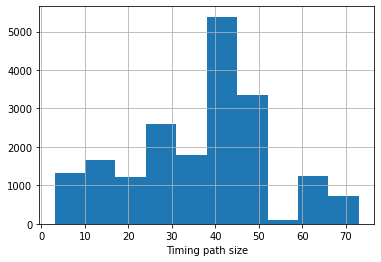

In [19]:
timing_path_df.no_of_gates.hist()
plt.xlabel("Timing path size")

Text(0.5, 0, 'Arrival Time (ns)')

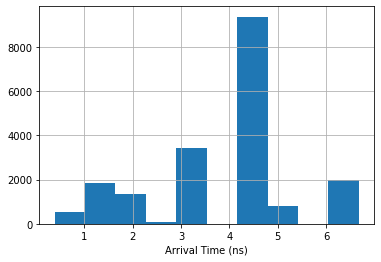

In [20]:
timing_path_df.arrival_time.hist()
plt.xlabel("Arrival Time (ns)")

In [21]:
area_metrics_df = dataset.db.get_table_data("power_metrics", phase="detailed_route")
area_metrics_df

circuit netlist_id           phase  combinational_power  \
0        tv80  id-000001  detailed_route             0.013600   
1         i2c  id-000001  detailed_route             0.000536   
2    mem_ctrl  id-000001  detailed_route             0.021000   
3  simple_spi  id-000001  detailed_route             0.000595   
4  systemcaes  id-000001  detailed_route             0.086200   
5     usb_phy  id-000001  detailed_route             0.000516   
6        sasc  id-000001  detailed_route             0.001160   
7    aes_core  id-000001  detailed_route             0.133000   

   sequential_power  macro_power  internal_power  switching_power  \
0           0.00276          0.0         0.01020         0.007720   
1           0.00234          0.0         0.00375         0.000786   
2           0.00957          0.0         0.02280         0.012500   
3           0.00254          0.0         0.00395         0.000852   
4           0.02330          0.0         0.07190         0.046500   
5           0.00247          0.0         0.00347         0.000745   
6           0.00289          0.0         0.00447         0.001210   
7           0.01130          0.0         0.07610         0.073300   

   leakage_power  total_power  
0   1.750000e-08      0.01790  
1   3.490000e-09      0.00453  
2   2.830000e-08      0.03530  
3   3.060000e-09      0.00480  
4   2.660000e-08      0.11800  
5   1.930000e-09      0.00421  
6   2.560000e-09      0.00568  
7   4.330000e-08      0.14900

In [22]:
timing_paths_df = dataset.db.get_table_data("timing_paths", phase="detailed_route", path_type="max")
timing_paths_df

circuit netlist_id           phase startpoint endpoint path_type  \
0          tv80  id-000001  detailed_route     _8886_   _8622_       max   
1          tv80  id-000001  detailed_route     _8886_   _8622_       max   
2          tv80  id-000001  detailed_route     _8886_   _8622_       max   
3          tv80  id-000001  detailed_route     _8886_   _8622_       max   
4          tv80  id-000001  detailed_route     _8886_   _8622_       max   
...         ...        ...             ...        ...      ...       ...   
19404  aes_core  id-000001  detailed_route    _25391_  _25364_       max   
19405  aes_core  id-000001  detailed_route    _25155_  _25272_       max   
19406  aes_core  id-000001  detailed_route    _25155_  _25272_       max   
19407  aes_core  id-000001  detailed_route    _25155_  _25272_       max   
19408  aes_core  id-000001  detailed_route    _25121_  _25312_       max   

       sort_index  arrival_time  required_time     slack  no_of_gates  \
0             0.0      6.680149       7.186763  0.506614         63.0   
1             1.0      6.673693       7.186763  0.513070         61.0   
2             2.0      6.663270       7.186763  0.523493         65.0   
3             3.0      6.658748       7.186763  0.528015         63.0   
4             4.0      6.655694       7.186763  0.531069         65.0   
...           ...           ...            ...       ...          ...   
19404         0.0      3.165393       4.211950  1.046557         25.0   
19405         0.0      3.122554       4.169160  1.046606         21.0   
19406         1.0      3.122554       4.169160  1.046606         21.0   
19407         2.0      3.122554       4.169160  1.046606         21.0   
19408         0.0      3.142307       4.189722  1.047415         29.0   

       is_critical_path  
0                     1  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
19404                 0  
19405                 0  
19406                 0  
19407                 0  
19408                 0  

[19409 rows x 12 columns]

<AxesSubplot:>

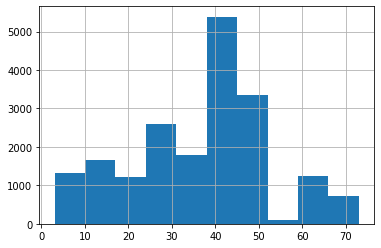

In [23]:
timing_paths_df.no_of_gates.hist()

<AxesSubplot:>

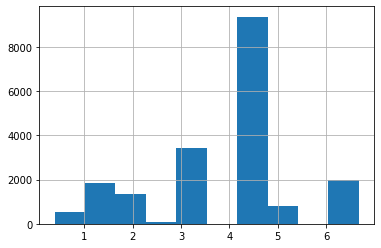

In [24]:
timing_paths_df.arrival_time.hist()

In [25]:
import re
import hashlib

def mae(target, predicted):
    """
    Calculate Mean Absolute Error (MAE)
    """
    if len(target) != len(predicted):
        raise ValueError("Target and predicted lists must have the same length.")
    return round(sum(abs(t - p) for t, p in zip(target, predicted)) / len(target), 4)


def mape(target, predicted):
    """
    Calculate Mean Absolute Percentage Error (MAPE)
    """
    if len(target) != len(predicted):
        raise ValueError("Target and predicted lists must have the same length.")
    return sum(abs(t - p) / abs(t) for t, p in zip(target, predicted) if t != 0) / len(target) * 100


def strip_integer_suffix(input_string):
    """Removes trailing digits from a string."""
    return re.sub(r'\d+$', '', input_string)

def should_skip_standard_cell(standard_cell):
    """Checks if the standard cell contains 'buf', 'metal', or 'inv'."""
    return any(keyword in standard_cell for keyword in ['buf'])

def generate_timing_path_hash(timing_path):
    """Generates a unique hash string for a timing path."""
    hash_str = timing_path.startpoint + timing_path.endpoint + timing_path.path_type
    
    for node in timing_path:
        entity = timing_path.nodes[node]["entity"]
        entity.standard_cell = strip_integer_suffix(entity.standard_cell)
        
        if should_skip_standard_cell(entity.standard_cell):
            continue
        
        hash_str += f"{entity.standard_cell}{entity.pin}{entity.is_rise_transition}"
    
    return hashlib.sha256(hash_str.encode()).hexdigest()

"""Builds a nested dictionary of timing paths for circuits and phases."""
timing_path_dict = {}

for circuit in selected_circuits:
    timing_path_dict[circuit] = {}
    for phase in ["global_place", "detailed_place", "detailed_route"]:
        timing_path_dict[circuit][phase] = {}
        netlist = dataset[(circuit, 'id-000001', phase)]

        for timing_paths in netlist.timing_paths.values():
            for timing_path in timing_paths:
                path_hash = generate_timing_path_hash(timing_path)
                if path_hash not in timing_path_dict[circuit][phase]:
                    timing_path_dict[circuit][phase][path_hash] = timing_path

In [26]:
data = []
for circuit in selected_circuits:
    phase1 = "global_place"
    phase2 = "detailed_route"
    intersect_keys = set(timing_path_dict[circuit][phase1].keys()).intersection(set(timing_path_dict[circuit][phase2].keys()))
    phase1_data, phase2_data = [], []
    for key in intersect_keys:
        phase1_data.append(timing_path_dict[circuit][phase1][key].arrival_time)
        phase2_data.append(timing_path_dict[circuit][phase2][key].arrival_time)
    phase1_netlist = dataset[(circuit, 'id-000001', phase1)]
    phase2_netlist = dataset[(circuit, 'id-000001', phase2)]
    data.append({
        "circuit": circuit,
        f"No. of total timing paths ({phase1})": sum([len(tp) for tp in phase1_netlist.timing_paths]),
        f"No. of total timing paths ({phase2})": sum([len(tp) for tp in phase2_netlist.timing_paths]),
        "No. of common timing paths": len(intersect_keys),
        "MAE (Baseline)": mae(phase2_data, phase1_data),
        "MAPE (Baseline)": mape(phase2_data, phase1_data),
    })

result_df = pd.DataFrame(data).set_index("circuit")
result_df.loc["average"] = result_df.mean()
result_df

No. of total timing paths (global_place)  \
circuit                                                
tv80                                        3150.000   
i2c                                         2754.000   
mem_ctrl                                   16917.000   
simple_spi                                  2304.000   
systemcaes                                 10980.000   
usb_phy                                     1737.000   
sasc                                        1560.000   
aes_core                                    3927.000   
average                                     5416.125   

            No. of total timing paths (detailed_route)  \
circuit                                                  
tv80                                            3633.0   
i2c                                             2475.0   
mem_ctrl                                       13635.0   
simple_spi                                      2385.0   
systemcaes                                      9186.0   
usb_phy                                         1797.0   
sasc                                            1563.0   
aes_core                                        4614.0   
average                                         4911.0   

            No. of common timing paths  MAE (Baseline)  MAPE (Baseline)  
circuit                                                                  
tv80                          1455.000         0.03480         6.258244  
i2c                            668.000         0.17540        39.755307  
mem_ctrl                      3779.000         0.03010         5.355969  
simple_spi                     761.000         0.08260        10.198852  
systemcaes                    3048.000         0.69150        51.113721  
usb_phy                        912.000         0.08920         9.956590  
sasc                           763.000         0.07570         6.286783  
aes_core                      1939.000         0.06270        11.091912  
average                       1665.625         0.15525        17.502172

In [27]:
data = []
for circuit in selected_circuits:
    phase1 = "detailed_place"
    phase2 = "detailed_route"
    intersect_keys = set(timing_path_dict[circuit][phase1].keys()).intersection(set(timing_path_dict[circuit][phase2].keys()))
    phase1_data, phase2_data = [], []
    for key in intersect_keys:
        phase1_data.append(timing_path_dict[circuit][phase1][key].arrival_time)
        phase2_data.append(timing_path_dict[circuit][phase2][key].arrival_time)
    phase1_netlist = dataset[(circuit, 'id-000001', phase1)]
    phase2_netlist = dataset[(circuit, 'id-000001', phase2)]
    data.append({
        "circuit": circuit,
        f"No. of total timing paths ({phase1})": sum([len(tp) for tp in phase1_netlist.timing_paths]),
        f"No. of total timing paths ({phase2})": sum([len(tp) for tp in phase2_netlist.timing_paths]),
        "No. of common timing paths": len(intersect_keys),
        "MAE (Baseline)": mae(phase2_data, phase1_data),
        "MAPE (Baseline)": mape(phase2_data, phase1_data),
    })

result_df = pd.DataFrame(data).set_index("circuit")
result_df.loc["average"] = result_df.mean()
result_df

No. of total timing paths (detailed_place)  \
circuit                                                  
tv80                                            3987.0   
i2c                                             2400.0   
mem_ctrl                                       11355.0   
simple_spi                                      2274.0   
systemcaes                                      8763.0   
usb_phy                                         1782.0   
sasc                                            1503.0   
aes_core                                        4128.0   
average                                         4524.0   

            No. of total timing paths (detailed_route)  \
circuit                                                  
tv80                                            3633.0   
i2c                                             2475.0   
mem_ctrl                                       13635.0   
simple_spi                                      2385.0   
systemcaes                                      9186.0   
usb_phy                                         1797.0   
sasc                                            1563.0   
aes_core                                        4614.0   
average                                         4911.0   

            No. of common timing paths  MAE (Baseline)  MAPE (Baseline)  
circuit                                                                  
tv80                           1419.00        0.034200         1.512588  
i2c                             955.00        0.050500         4.331399  
mem_ctrl                       3828.00        0.011700         1.028285  
simple_spi                      794.00        0.030900         4.262785  
systemcaes                     3453.00        0.226000        16.522906  
usb_phy                         970.00        0.026400         2.917901  
sasc                            915.00        0.000800         0.173469  
aes_core                       2364.00        0.060200         4.941898  
average                        1837.25        0.055087         4.461404